In [1]:
import numpy as np, basic, prjlib, plottools as pl
from matplotlib.pyplot import *

In [2]:
Tcmb = 2.72e6
ntype = 'base'
ntype = 'base_roll50'

In [3]:
p = {}
TT, EE, BB, TN, EN, BN = {}, {}, {}, {}, {}, {}
#submaps = ['00','01','10','11','20','21','30','31','40','41','50','51','com']
submaps = ['20','21','30','31','40','41','50','51','com']
#for t, lmax in [('sa',2048),('la',4096)]:
for t, lmax in [('la',4096)]:
    for submap in submaps:
        p[t+submap] = prjlib.analysis_init(t=t,submap=submap,ntype=ntype)
        print('loading from',p[t+submap].fcmb.scl['o'])
        l, TT[t+submap], EE[t+submap], BB[t+submap] = np.loadtxt(p[t+submap].fcmb.scl['s'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
        l, TN[t+submap], EN[t+submap], BN[t+submap] = np.loadtxt(p[t+submap].fcmb.scl['n'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
pid = prjlib.analysis_init(t='id',ntype='cv')
l, TT['id'], EE['id'], BB['id'] = np.loadtxt(pid.fcmb.scl['o'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
L = np.linspace(0,2048,2049)
s = l*(l+1.)*Tcmb**2/2./np.pi
lTT = p['lacom'].lTT

loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la20_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la21_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la30_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la31_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la40_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la41_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la50_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la51_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/lacom_base_roll50_mv3_a5.0deg_none_o.dat


In [4]:
# analytic noise
NT, NE, NB = prjlib.nlofficial(ntype[:4],deproj=-1,cols=(3,4,5,6))

Temperature

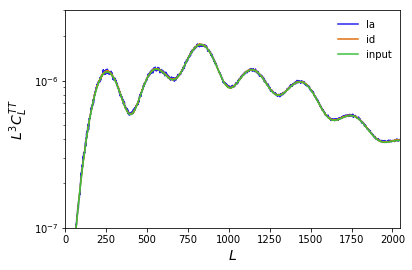

In [5]:
# TT
pl.plot_1dstyle(xmin=2,xmax=2048,ylab='$L^3C_L^{TT}$',ylog=True,ymin=1e-7,ymax=3e-6)
#plot(L,L**3*TT['sa93'],label='sa')
plot(l,l**3*TT['la20'],label='la')
plot(l,l**3*TT['id'],label='id')
plot(l,l**3*lTT[:lmax+1],label='input')
legend()

20 2.2969276240319097e-17
21 2.286658483381249e-16
30 2.4109123015986353e-17
31 2.375603179778536e-16
40 2.4572980300717423e-17
41 2.3577374456716183e-16
50 2.3593636370593182e-17
51 2.364341604002409e-16
com 5.125468002755719e-18


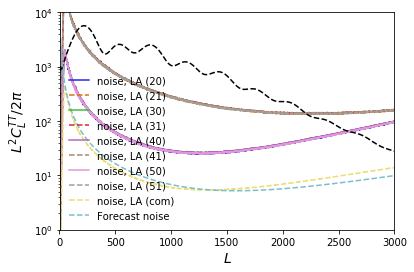

In [6]:
pl.plot_1dstyle(xmin=2,xmax=3000,ylab='$L^2C_L^{TT}/2\pi$',ylog=True,ymin=1.,ymax=1e4)
#plot(l,s*TT['lacom'],label='signal, LA (com)')
#plot(l,s*TN['lacom'],label='noise, LA (com)')
for submap in submaps:
    if submap[1] == '0': ls = '-'
    if submap[1] == '1': ls = '--'
    print(submap,TN['la'+submap][1000])
    plot(l,s*TN['la'+submap],label='noise, LA ('+submap+')',ls=ls)
plot(l,s*lTT[:lmax+1],'k--')
plot(l,s*NT[:lmax+1]/Tcmb**2,'--',label='Forecast noise')
legend(loc=0)

Polarization

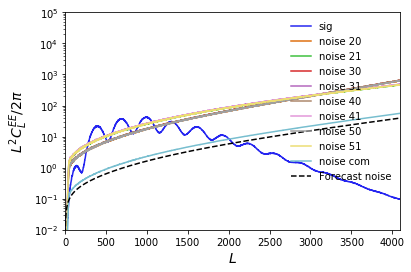

In [10]:
# EE + noise
pl.plot_1dstyle(xmin=2,xmax=4096,ylab='$L^2C_L^{EE}/2\pi$',ylog=True,ymin=1e-2,ymax=1e5)
for submap in submaps:
    if submap=='20':  plot(l,s*EE['la'+submap],label='sig')
    plot(l,s*EN['la'+submap],label='noise '+submap)
plot(l,s*NE[:lmax+1]/Tcmb**2,'k--',label='Forecast noise')
legend()

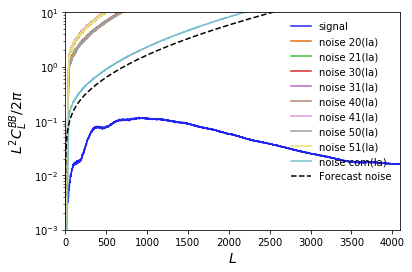

In [13]:
# BB + noise
pl.plot_1dstyle(xmin=2,xmax=4096,ylab='$L^2C_L^{BB}/2\pi$',ylog=True,ymin=1e-3,ymax=1e1)
for t, l0 in [('la',l)]:
#for t, l0 in [('la',l),('sa',L)]:
    for submap in submaps:
        if t=='la' and submap=='20':  plot(l,s*BB[t+submap],label='signal')
        plot(l0,l0*(l0+1.)*BN[t+submap]/2./np.pi*Tcmb**2,label='noise '+submap+'('+t+')')
plot(l,s*NB[:lmax+1]/Tcmb**2,'k--',label='Forecast noise')
legend()